In [1]:
import math

import statistics

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import glob 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\Vandhana\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
os.chdir(r'C:/Users/Vandhana/Documents/iim skills/python/class 5')

In [4]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv")) 
append_data = []
for x in csv_files:
    df = pd.read_csv(x)
    df.columns = df.iloc[1]
    df = df.iloc[2:].reset_index(drop= True)
    append_data.append(df)
df_final = pd.concat(append_data)
df_final = df_final[['Date','channelKey', 'ProductKey','UnitCost', 'UnitPrice', 'SalesQuantity','ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'GeographyKey']]

C:\Users\Vandhana\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
xls = pd.ExcelFile('lookup1.xlsx')
df1 = pd.read_excel(xls, 'Product')
df2 = pd.read_excel(xls, 'Geography')
df3 = pd.read_excel(xls, 'Channel')

In [6]:
df_final[["channelKey",'ProductKey','GeographyKey']]= df_final[["channelKey",'ProductKey','GeographyKey']].astype(int)
df_final[['UnitCost', 'UnitPrice',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount']] = df_final[['UnitCost', 'UnitPrice',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount']].astype(float)
df_final1 = pd.merge(df_final,df3,how = "left",left_on='channelKey', right_on='ChannelKey')
df_final1 = pd.merge(df_final1,df2,how = "left",left_on='GeographyKey', right_on='GeographyKey')
df_final1 = pd.merge(df_final1,df1,how = "left",left_on='ProductKey', right_on='ProductKey')
df_final1 = df_final1.drop(columns= ['channelKey','GeographyKey','ProductKey'])

In [7]:
Stat = df_final1[['Date', 'UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']]
Stat = Stat.set_index("Date")
Stat[['UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']] = Stat[['UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']].astype(int)

# Central tendency
- Mean
-Mode
-Median

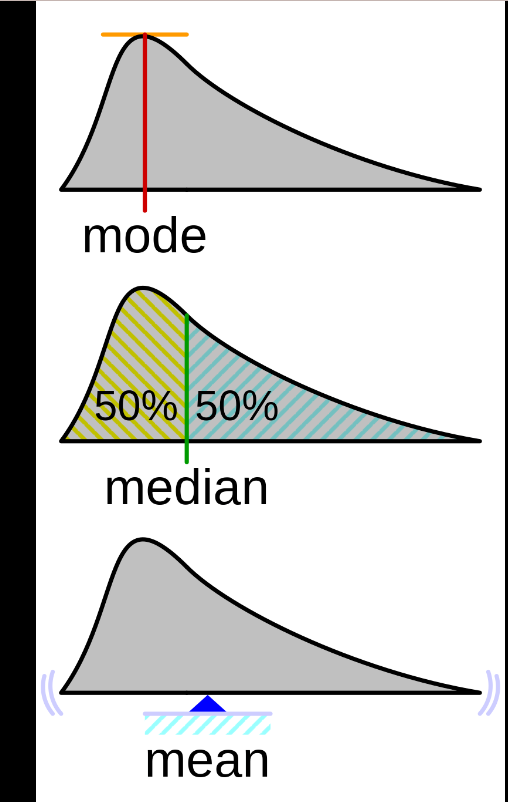

# Mean

In [16]:
numbers = [10,20,30,40,50,60,70,80,90,1000]

In [17]:
mean = sum(numbers)/len(numbers)

In [18]:
print(mean)

145.0


In [19]:
statistics.mean(numbers)

145

# Median

In [37]:
#important to arrange either ascending or desecnding order

In [36]:
Median = [10,30,20,40,60,80,70,90,100,50]

In [37]:
statistics.median(Median)

55.0

In [40]:
Median.sort()

In [41]:
Median

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [42]:
Median[len(Median)//2]

60

In [43]:
Median[len(Median)//2 -1]

50

In [44]:
(Median[len(Median)//2]+Median[len(Median)//2 -1])//2


55

In [45]:
if len(Median)%2==0:
    print((Median[len(Median)//2]+Median[len(Median)//2 -1])//2)
else:
    Median[len(Median)//2]
    

55


# Mode

In [46]:
mode = [10,10,10,30,30,40,40,60]

In [47]:
statistics.mode(numbers)

10

In [48]:
set(mode)

{10, 30, 40, 60}

In [49]:
max(set(mode),key = mode.count)

10

# Standard deviation and variance

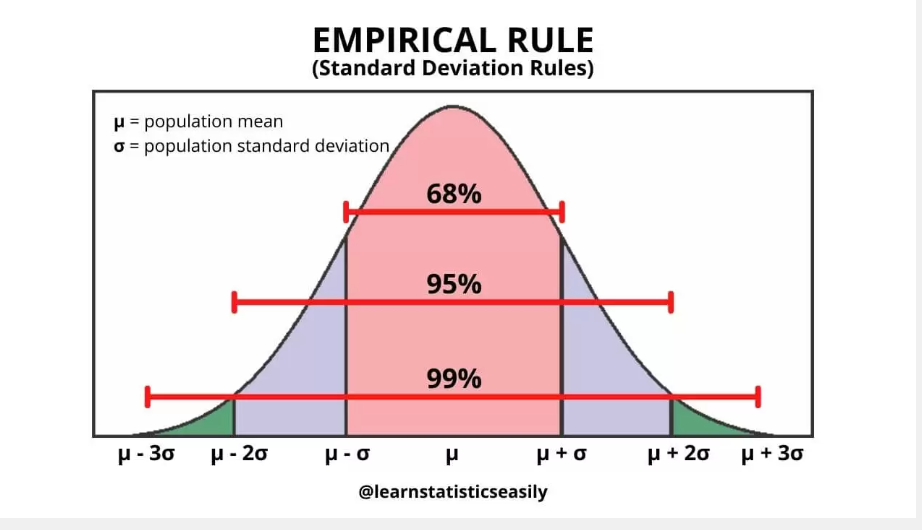

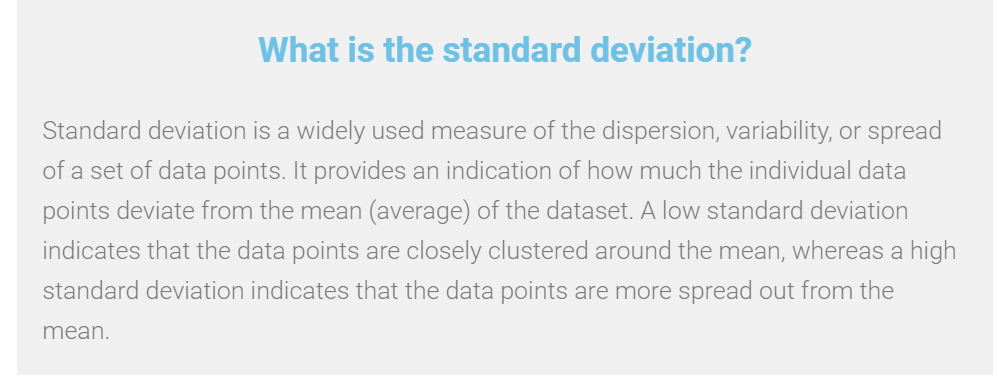

#A large standard deviation indicates that the data is spread out, - a small standard deviation indicates that the data is clustered closely around the mean

In [50]:
SD = [10,20,30,40,50,60,70,80,90,100,1000,10000]


In [51]:
statistics.stdev(SD)

2859.1420359643175

In [52]:
statistics.variance(SD)

8174693.181818182

In [53]:
math.sqrt(statistics.variance(SD))

2859.1420359643175

In [55]:
df_final1.head()

,Date,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ChannelKey,ChannelName,ContinentName,ProductName,Sub category,Category
0,01-01-2014,73.12,159.00,9.0,0.0,0.00,0.0,0.00,658.08,1431.00,1,Store,North America,Proseware Photo Ink Jet Printer M100 White,"Printers, Scanners & Fax",Computers
1,01-01-2014,509.32,999.00,3.0,1.0,999.00,1.0,149.85,1527.96,2847.15,1,Store,Asia,Litware Washer & Dryer 15.5in E150 Green,Washers & Dryers,Home Appliances
2,01-01-2014,16.31,32.00,4.0,0.0,0.00,7.0,11.20,65.24,116.80,2,Online,North America,MGS Age of Empires II: The Conquerors Expansio...,Download Games,Games and Toys
3,01-01-2014,105.77,230.00,18.0,0.0,0.00,1.0,11.50,1903.86,4128.50,2,Online,North America,"The Phone Company Touch Screen Phones 26-2.2"" ...",Touch Screen Phones,Cell phones
4,01-01-2014,1.71,3.35,80.0,1.0,3.35,0.0,0.00,136.80,268.00,1,Store,North America,Contoso In-Line Coupler E180 Silver,Cell phones Accessories,Cell phones


In [56]:
Stat.describe()

,UnitCost,UnitPrice,TotalCost,SalesAmount
count,859505.000000,859505.000000,859505.000000,859505.000000
mean,139.363512,333.347903,1601.002135,3779.815417
std,167.467721,429.194189,2104.667639,5318.017167
min,0.000000,0.000000,1.000000,3.000000
25%,32.000000,69.000000,314.000000,657.000000
50%,84.000000,188.000000,919.000000,2080.000000
75%,204.000000,445.000000,2107.000000,4990.000000
max,960.000000,2899.000000,91411.000000,272718.000000


In [57]:
Stat.UnitCost.mean()

139.36351155607005

In [58]:
Std =Stat.UnitCost

In [59]:
statistics.stdev(Std)

167.46772140060142

In [60]:
statistics.median(Std)

84

# try statistics formula in python

In [52]:
SD = [1,1,3,2,4,5,4,7]
SD = pd.DataFrame(SD)

In [53]:
SD.describe()

,0
count,8.000000
mean,3.375000
std,2.065879
min,1.000000
25%,1.750000
50%,3.500000
75%,4.250000
max,7.000000


In [64]:
penguins = sns.load_dataset("penguins")

In [65]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [66]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


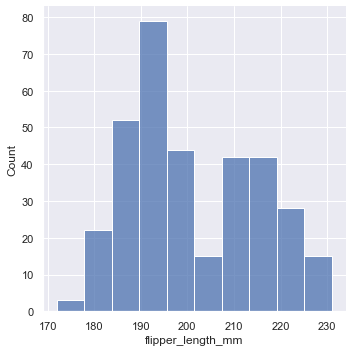

In [67]:
sns.displot(penguins, x="flipper_length_mm")

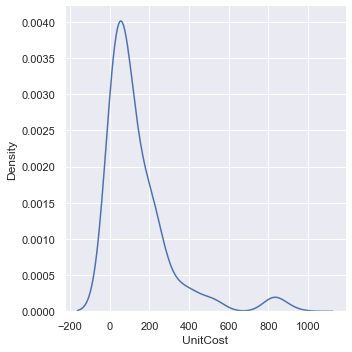

In [68]:
sns.displot(df_final1, x="UnitCost",kind = "kde",bw_adjust=5)

In [59]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

NameError: name 'penguins' is not defined

In [65]:
Stat.head(5)

,UnitCost,UnitPrice,TotalCost,SalesAmount
Date,,,,
01-01-2014,73,159,658,1431
01-01-2014,509,999,1527,2847
01-01-2014,16,32,65,116
01-01-2014,105,230,1903,4128
01-01-2014,1,3,136,268


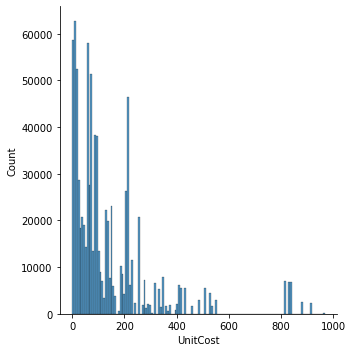

In [68]:
sns.displot(Stat, x="UnitCost",binwidth = 7)

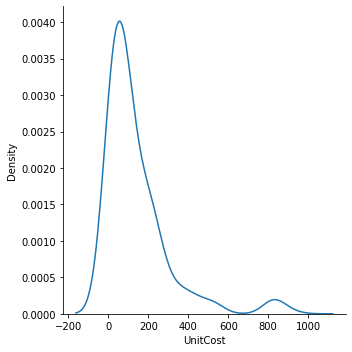

In [71]:
sns.displot(Stat, x="UnitCost",kind = "kde",bw_adjust=5)

In [78]:
UnitCost = df_final1["UnitCost"]

In [80]:
UnitCost = set(UnitCost)

In [82]:
UnitCost = pd.DataFrame(UnitCost)

In [88]:
UnitCost.head()

,0
0,1.71
1,2.54
2,3.54
3,4.08
4,4.13


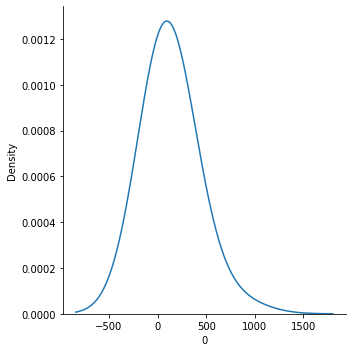

In [87]:
sns.displot(UnitCost, x=0,kind = "kde",bw_adjust=5)

# Ploting 

In [8]:

sns.set_theme(style="darkgrid")


C:\Users\Vandhana\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Scatter plot

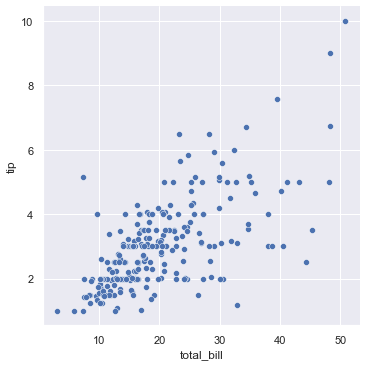

In [9]:
tips = sns.load_dataset("tips")
tips.head()
sns.relplot(data=tips, x="total_bill", y="tip")

In [10]:
df_final1.head(2)

,Date,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ChannelKey,ChannelName,ContinentName,ProductName,Sub category,Category
0,01-01-2014,73.12,159.0,9.0,0.0,0.0,0.0,0.00,658.08,1431.00,1,Store,North America,Proseware Photo Ink Jet Printer M100 White,"Printers, Scanners & Fax",Computers
1,01-01-2014,509.32,999.0,3.0,1.0,999.0,1.0,149.85,1527.96,2847.15,1,Store,Asia,Litware Washer & Dryer 15.5in E150 Green,Washers & Dryers,Home Appliances


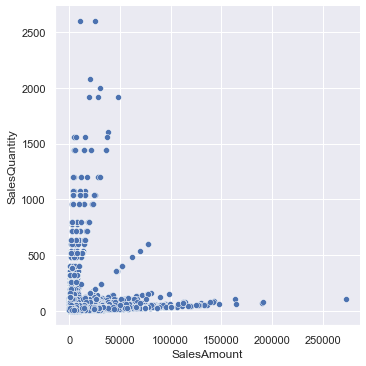

In [11]:
sns.relplot(data=df_final1, x="SalesAmount", y="SalesQuantity" )

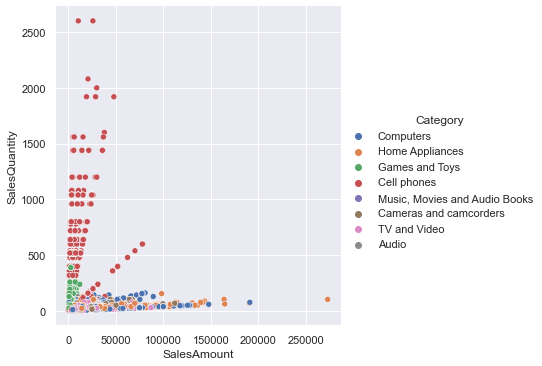

In [12]:
sns.relplot(data=df_final1, x="SalesAmount", y="SalesQuantity", hue = 'Category' )

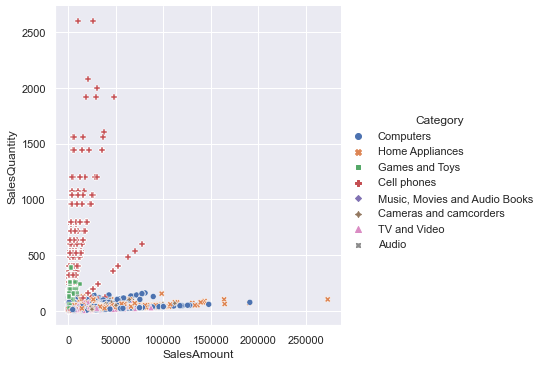

In [13]:
sns.relplot(data=df_final1, x="SalesAmount", y="SalesQuantity", hue = 'Category', style = 'Category' )

# Line plot

In [159]:
dowjones = sns.load_dataset("dowjones")
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


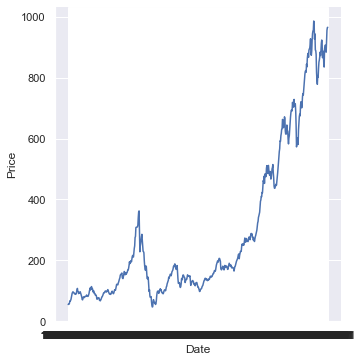

In [163]:
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

C:\Users\Vandhana\anaconda3\lib\site-packages\seaborn\relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


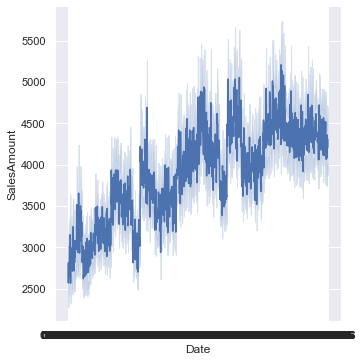

In [170]:
sns.relplot(data=df_final1, x="Date", y="SalesAmount", kind="line" )


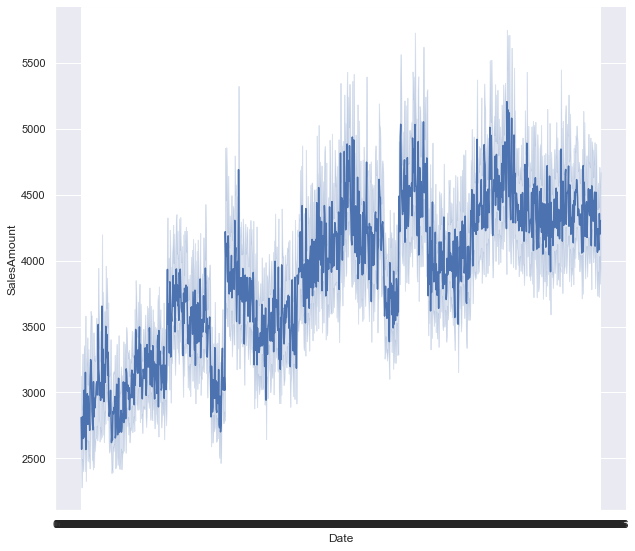

In [174]:

f = sns.relplot(data = df_final1, x="Date", y="SalesAmount", kind="line", )

f.fig.set_size_inches(10,8)

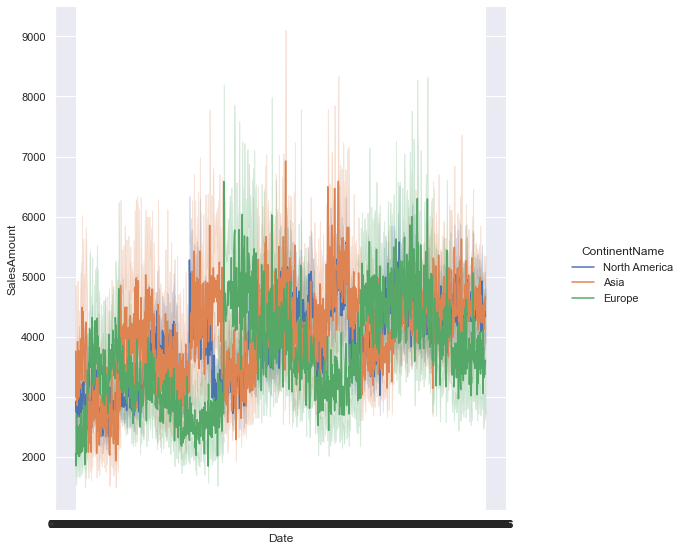

In [176]:
f = sns.relplot(data = df_final1, x="Date", y="SalesAmount", kind="line", hue = 'ContinentName' )

f.fig.set_size_inches(10,8)

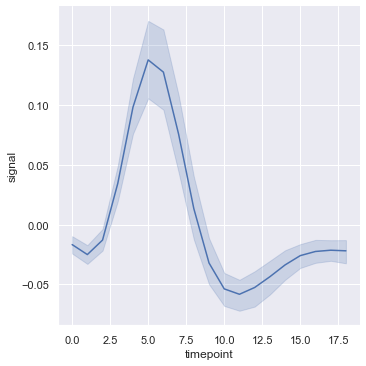

In [15]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

In [18]:
fmri.region.unique()

array(['parietal', 'frontal'], dtype=object)

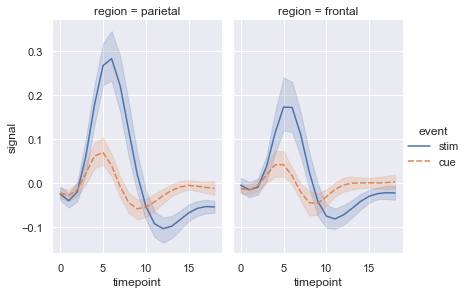

In [17]:
sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)

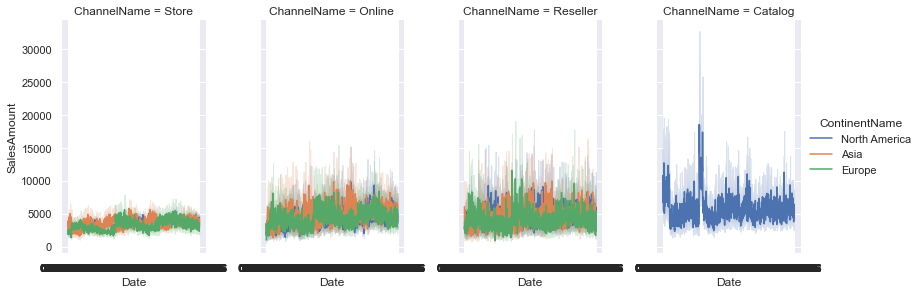

In [20]:
sns.relplot(
    data=df_final1,
    x="Date", y="SalesAmount", kind="line", hue = 'ContinentName', col="ChannelName",
    height=4, aspect=.7,
)

In [70]:
df_final1["Date"]= pd.to_datetime(df_final1.Date,format='%d-%m-%Y', errors='coerce')


In [ ]:
f = sns.displot(data = df_final1, x="Date", y="SalesAmount", kind="kde", )

f.fig.set_size_inches(10,8)